# Creating matrices for each sub-path according to the move

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
#from PIL import Image

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

path = "/content/DB-Output_original.csv"
data = pd.read_csv(path)

data = data.loc[:, ['Initial Solution', 'Moves', 'OFIS', 'OFFS', 'OF_Diff']]
data = data[data.OF_Diff != 0]
#data = data.reset_index(drop=False)

print(data.shape)
data.head(10)

(9248, 5)


Initial Solution  \
5   [['D0', 'C61', 'D0'], ['D0', 'C24', 'C50', 'D0...   
21  [['D0', 'C24', 'D0'], ['D0', 'C26', 'C25', 'D0...   
30  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C91...   
37  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'C6...   
40  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...   
43  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...   
46  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C24...   
47  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...   
49  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...   
50  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...   

                                                Moves         OFIS  \
5   ['null', 'null', 'ProbabilisticWorstRemovalCus...  30978.64707   
21  ['null', 'null', 'WorstTimeDestroyCustomer', '...  26301.09614   
30  ['null', 'null', 'WorstTimeDestroyCustomer', '...  23702.14047   
37  ['null', 'null', 'RandomRouteDestroyCustomer',...  18726.22750   
40  ['null', 'null', 'TimeBasedDestroyCustomer', '...  17507.99998   
43  ['null', 'null', 'WorstDistanceDestroyCustomer...  17471.76518   
46  ['null', 'null', 'WorstDistanceDestroyCustomer...  17469.41941   
47  ['null', 'null', 'DemandBasedDestroyCustomer',...  16251.78228   
49  ['RandomDestroyStation', 'DeterministicBestRep...  16249.43924   
50  ['null', 'null', 'WorstTimeDestroyCustomer', '...  16221.64776   

           OFFS      OF_Diff  
5   26301.09614  4677.550934  
21  23702.14047  2598.955662  
30  18726.22750  4975.912973  
37  17507.99998  1218.227524  
40  17471.76518    36.234795  
43  17469.41941     2.345772  
46  16251.78228  1217.637127  
47  16249.43924     2.343046  
49  16221.64776    27.791482  
50  15005.40910  1216.238655

# List of available and applied moves

From the initial dataframe, a list called 'mv' is created, in which all the different moves applied and shown in the table are included.

In [3]:
mv = data["Moves"]
moves = []
for row in mv:
    for elem in row.split("', '"):
        moves.append(elem)

for i in range(len(moves)):
    moves[i] = moves[i].replace("['","")
    moves[i] = moves[i].replace("']","")

to_remove = "null"
moves = list(filter(lambda x: x != to_remove, moves))

moves=list(set(moves))

print("List off", len(moves), "possible e different moves: \n", moves)

List off 16 possible e different moves: 
 ['GreedyRepairCustomer', 'WorstTimeDestroyCustomer', 'DeterministicBestRepairStation', 'ProximityBasedDestroyCustomer', 'ProbabilisticBestRepairStation', 'ZoneDestroyCustomer', 'RandomDestroyStation', 'GreedyDestroyCustomer', 'WorstDistanceDestroyCustomer', 'GreedyRouteRemoval', 'ShawDestroyCustomer', 'ProbabilisticWorstRemovalCustomer', 'RandomRouteDestroyCustomer', 'LongestWaitingTimeDestroyStation', 'DemandBasedDestroyCustomer', 'TimeBasedDestroyCustomer']


In [4]:
data["Moves"] = data["Moves"].str.replace("[","")
data["Moves"] = data["Moves"].str.replace("]","")
data["Moves"] = data["Moves"].str.replace("'","")
data.head(10)

Initial Solution  \
5   [['D0', 'C61', 'D0'], ['D0', 'C24', 'C50', 'D0...   
21  [['D0', 'C24', 'D0'], ['D0', 'C26', 'C25', 'D0...   
30  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C91...   
37  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'C6...   
40  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...   
43  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...   
46  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C24...   
47  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...   
49  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...   
50  [['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...   

                                                Moves         OFIS  \
5   null, null, ProbabilisticWorstRemovalCustomer,...  30978.64707   
21  null, null, WorstTimeDestroyCustomer, GreedyRe...  26301.09614   
30  null, null, WorstTimeDestroyCustomer, GreedyRe...  23702.14047   
37  null, null, RandomRouteDestroyCustomer, Greedy...  18726.22750   
40  null, null, TimeBasedDestroyCustomer, GreedyRe...  17507.99998   
43  null, null, WorstDistanceDestroyCustomer, Gree...  17471.76518   
46  null, null, WorstDistanceDestroyCustomer, Gree...  17469.41941   
47  null, null, DemandBasedDestroyCustomer, Greedy...  16251.78228   
49  RandomDestroyStation, DeterministicBestRepairS...  16249.43924   
50  null, null, WorstTimeDestroyCustomer, GreedyRe...  16221.64776   

           OFFS      OF_Diff  
5   26301.09614  4677.550934  
21  23702.14047  2598.955662  
30  18726.22750  4975.912973  
37  17507.99998  1218.227524  
40  17471.76518    36.234795  
43  17469.41941     2.345772  
46  16251.78228  1217.637127  
47  16249.43924     2.343046  
49  16221.64776    27.791482  
50  15005.40910  1216.238655

In [5]:
user_input = input("Insert one of 16 possibly moves: ")
data = data.loc[data['Moves'].str.contains(user_input)]
data

Insert one of 16 possibly moves: RandomDestroyStation


Initial Solution  \
49     [['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...   
64     [['D0', 'C21', 'C25', 'C24', 'D0'], ['D0', 'C5...   
79     [['D0', 'C81', 'S1', 'C85', 'C90', 'D0'], ['D0...   
169    [['D0', 'C50', 'S11', 'D0'], ['D0', 'C90', 'C9...   
199    [['D0', 'C50', 'D0'], ['D0', 'C90', 'C91', 'C8...   
...                                                  ...   
35215  [['D0', 'C5', 'C10', 'C11', 'C16', 'C19', 'C18...   
35350  [['D0', 'C78', 'C67', 'D0'], ['D0', 'C24', 'D0...   
35375  [['D0', 'C24', 'D0'], ['D0', 'C5', 'C77', 'C78...   
35385  [['D0', 'C5', 'C2', 'C1', 'C14', 'C25', 'C21',...   
35390  [['D0', 'C5', 'C2', 'C1', 'C14', 'C25', 'S9', ...   

                                                   Moves          OFIS  \
49     RandomDestroyStation, DeterministicBestRepairS...  16249.439240   
64     RandomDestroyStation, ProbabilisticBestRepairS...  14991.375650   
79     RandomDestroyStation, ProbabilisticBestRepairS...  11347.289090   
169    RandomDestroyStation, ProbabilisticBestRepairS...  11388.615630   
199    RandomDestroyStation, DeterministicBestRepairS...  10162.383810   
...                                                  ...           ...   
35215  RandomDestroyStation, DeterministicBestRepairS...  42453.344550   
35350  RandomDestroyStation, ProbabilisticBestRepairS...  14742.127590   
35375  RandomDestroyStation, DeterministicBestRepairS...   7297.435520   
35385  RandomDestroyStation, DeterministicBestRepairS...   4844.669310   
35390  RandomDestroyStation, DeterministicBestRepairS...   4838.020483   

               OFFS      OF_Diff  
49     16221.647760    27.791482  
64     13775.899950  1215.475703  
79     11335.314740    11.974343  
169    11375.960480    12.655152  
199    10153.083790     9.300018  
...             ...          ...  
35215  42085.062130   368.282414  
35350  11918.782800  2823.344791  
35375   7297.381645     0.053875  
35385   4843.734853     0.934457  
35390   4811.496557    26.523926  

[477 rows x 5 columns]

aggiungere tecniche per bilanciamento 

These steps are used to isolate the places contained in the 'Initial Solution' column, so that a matrix can be constructed according to the move being considered

In [6]:
init_sol = data['Initial Solution']
init_sol.head(10)

#path isolation -> all paths of all indices are included in the sol list
sol = []
for row in init_sol:
    for elem in row.split("[' "):
        sol.append(elem)

for i in range(len(sol)):
    sol[i] = sol[i].replace("[['","")
    sol[i] = sol[i].replace("']]","")
    sol[i] = sol[i].replace("'","")
    sol[i] = sol[i].replace(",","")
    sol[i] = sol[i].replace("[","")    
    
for i in range(len(sol)):
    sol[i] = sol[i].split('] ')

In [7]:
data["Initial Solution"] = data["Initial Solution"].str.replace("[","")
data["Initial Solution"] = data["Initial Solution"].str.replace("]","")
data["Initial Solution"] = data["Initial Solution"].str.replace(",","")
data["Initial Solution"] = data["Initial Solution"].str.replace("'","")

init_sol = data["Initial Solution"]

places = []
for row in init_sol:
    for elem in row.split():
        places.append(elem)

places = np.array(places)
distinct_places = np.unique(places)

print(distinct_places)
print(len(distinct_places))


['C1' 'C10' 'C100' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19'
 'C2' 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C3'
 'C30' 'C31' 'C32' 'C33' 'C34' 'C35' 'C36' 'C37' 'C38' 'C39' 'C4' 'C40'
 'C41' 'C42' 'C43' 'C44' 'C45' 'C46' 'C47' 'C48' 'C49' 'C5' 'C50' 'C51'
 'C52' 'C53' 'C54' 'C55' 'C56' 'C57' 'C58' 'C59' 'C6' 'C60' 'C61' 'C62'
 'C63' 'C64' 'C65' 'C66' 'C67' 'C68' 'C69' 'C7' 'C70' 'C71' 'C72' 'C73'
 'C74' 'C75' 'C76' 'C77' 'C78' 'C79' 'C8' 'C80' 'C81' 'C82' 'C83' 'C84'
 'C85' 'C86' 'C87' 'C88' 'C89' 'C9' 'C90' 'C91' 'C92' 'C93' 'C94' 'C95'
 'C96' 'C97' 'C98' 'C99' 'D0' 'S0' 'S1' 'S10' 'S11' 'S12' 'S13' 'S14'
 'S15' 'S16' 'S17' 'S18' 'S19' 'S2' 'S20' 'S3' 'S4' 'S5' 'S7' 'S9']
120


In [8]:
# empty list
lista_principale = [] # contains n elements, each element contains n dataframes related to the n-th index

for index_ext, value_ext in enumerate(sol):
    
    lista_dataframe = []
    for index_int, value_int in enumerate(value_ext):

        #print(type(value_ext, value_int))
        zeros = np.zeros([len(distinct_places), len(distinct_places)])
        df = pd.DataFrame(zeros, index=distinct_places, columns=distinct_places)

        temp_string = value_int

        split = temp_string.split(" ")
        split = np.array(split)

        for i in range(len(split)-1):

            df.loc[split[i], split[i+1]] = 1

        lista_dataframe.append(df)

    # sum of the resulting dataframes into a single dataframe
    df_sum = lista_dataframe[0]
    for i in range (1, len(lista_dataframe)):
        df_sum = df_sum.add(lista_dataframe[i])

    # insert the sum dataframe in the main list
    lista_principale.append(df_sum)

In [9]:
lista_principale

[       C1  C10  C100  C11  C12  C13  C14  C15  C16  C17  C18  C19   C2  C20  \
 C1    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 C10   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 C100  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 C11   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 C12   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 ...   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 S3    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 S4    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 S5    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 S7    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
 S9    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 
       C21  C22  C23  C24  C25  C26  C

In [ ]:
result_list = []

for df in lista_principale:
    df_as_array = np.array(df)
    result_list.append(df_as_array)


In [10]:
X = np.array([df.to_numpy() for df in lista_principale])

In [ ]:
#my_list = [pd.DataFrame(np.random.randint(10, size=(120, 120))) for _ in range(800)]
#out = np.array([df.to_numpy() for df in my_list])

In [11]:
improvement = pd.Series()
data['Improvement'] = improvement

label = pd.Series()
data['Label'] = label

data.head()

<ipython-input-11-d6141cfae804>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  improvement = pd.Series()
<ipython-input-11-d6141cfae804>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  label = pd.Series()


Initial Solution  \
49   D0 C26 C25 D0 D0 C24 C6 D0 D0 C91 D0 D0 C50 D0...   
64   D0 C21 C25 C24 D0 D0 C50 D0 D0 C81 S1 C85 C90 ...   
79   D0 C81 S1 C85 C90 D0 D0 C18 C15 C16 S7 D0 D0 C...   
169  D0 C50 S11 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18...   
199  D0 C50 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18 C15...   

                                                 Moves         OFIS  \
49   RandomDestroyStation, DeterministicBestRepairS...  16249.43924   
64   RandomDestroyStation, ProbabilisticBestRepairS...  14991.37565   
79   RandomDestroyStation, ProbabilisticBestRepairS...  11347.28909   
169  RandomDestroyStation, ProbabilisticBestRepairS...  11388.61563   
199  RandomDestroyStation, DeterministicBestRepairS...  10162.38381   

            OFFS      OF_Diff  Improvement  Label  
49   16221.64776    27.791482          NaN    NaN  
64   13775.89995  1215.475703          NaN    NaN  
79   11335.31474    11.974343          NaN    NaN  
169  11375.96048    12.655152          NaN    NaN  
199  10153.08379     9.300018          NaN    NaN

In [12]:
conditions = [
    (data['OF_Diff'] < 0), #negative
    (data['OF_Diff'] >= 0) & (data['OF_Diff'] < 2), #zero
    (data['OF_Diff'] >= 2) & (data['OF_Diff'] < 10), #little
    (data['OF_Diff'] >= 10) & (data['OF_Diff'] < 60), #medium
    (data['OF_Diff'] >= 60) #a lot
]

classi = ["Negative", "Zero", "Little", "Medium", "Lot"]
label = [0, 1, 2, 3, 4]

data['Improvement'] = np.select(conditions, classi)
data["Label"] = np.select(conditions, label)

data.head()

Initial Solution  \
49   D0 C26 C25 D0 D0 C24 C6 D0 D0 C91 D0 D0 C50 D0...   
64   D0 C21 C25 C24 D0 D0 C50 D0 D0 C81 S1 C85 C90 ...   
79   D0 C81 S1 C85 C90 D0 D0 C18 C15 C16 S7 D0 D0 C...   
169  D0 C50 S11 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18...   
199  D0 C50 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18 C15...   

                                                 Moves         OFIS  \
49   RandomDestroyStation, DeterministicBestRepairS...  16249.43924   
64   RandomDestroyStation, ProbabilisticBestRepairS...  14991.37565   
79   RandomDestroyStation, ProbabilisticBestRepairS...  11347.28909   
169  RandomDestroyStation, ProbabilisticBestRepairS...  11388.61563   
199  RandomDestroyStation, DeterministicBestRepairS...  10162.38381   

            OFFS      OF_Diff Improvement  Label  
49   16221.64776    27.791482      Medium      3  
64   13775.89995  1215.475703         Lot      4  
79   11335.31474    11.974343      Medium      3  
169  11375.96048    12.655152      Medium      3  
199  10153.08379     9.300018      Little      2

In [ ]:
data.to_csv("prova.csv")

To recap, starting with the choice of a move (from the 16 available), all iterations of the algorithm that apply the move in question are taken.

Adjacency matrices are then generated for each sub-path in which the chosen move is applied, and summed up all the matrices into a single resultant per iteration.

At the end, in 'main_list', a list containing the resulting adjacency matrices from all iterations is obtained.

# Example notebook iteration

- take the main dataframe

- one of 16 possible moves is chosen (e.g. 'ShawDestroyCustomer', 'ProximityBasedDestroyCustomer', 'GreedyRouteRemoval'...)

- the original dataframe is reduced to just the interactions where the chosen move was applied

- for each row of the dataframe we have an iteration comprising several sub-paths

- an adjacency (sub)matrix is generated for each sub-path (so we have n matrices per row)

- each (sub)matrix is summed into a single resulting matrix (so one per row)

- the resulting adjacency matrices relating to a specific move are placed in a list.

In [13]:
y = data["Label"].values
X.shape, y.shape

((477, 120, 120), (477,))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

x_test.shape, y_train.shape

((96, 120, 120), (381,))

In [15]:
from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
type(x_train[0])

numpy.ndarray

In [ ]:
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
#y_train = np.reshape(y_train, (y_train.shape[0], 1))

#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
#y_test = np.reshape(y_test, (y_test.shape[0], 1))

#x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
print(x_test, y_test)

Esperimento con L1=4, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 4s 320ms/step - loss: 1.6478 - accuracy: 0.1470 - val_loss: 1.6498 - val_accuracy: 0.1562
Epoch 2/10
12/12 [==============================] - 4s 307ms/step - loss: 1.6108 - accuracy: 0.2283 - val_loss: 1.6410 - val_accuracy: 0.3229
Epoch 3/10
12/12 [==============================] - 4s 305ms/step - loss: 1.5812 - accuracy: 0.3071 - val_loss: 1.6396 - val_accuracy: 0.3229
Epoch 4/10
12/12 [==============================] - 4s 303ms/step - loss: 1.5516 - accuracy: 0.3123 - val_loss: 1.6361 - val_accuracy: 0.3229
Epoch 5/10
12/12 [==============================] - 4s 303ms/step - loss: 1.5275 - accuracy: 0.3123 - val_loss: 1.6300 - val_accuracy: 0.3229
Epoch 6/10
12/12 [==============================] - 4s 300ms/step - loss: 1.5090 - accuracy: 0.3202 - val_loss: 1.6257 - val_accuracy: 0.3438
Epoch 7/10
12/12 [==============================] - 4s 301ms/step - loss: 1.4913 - accuracy: 0.3412 - va

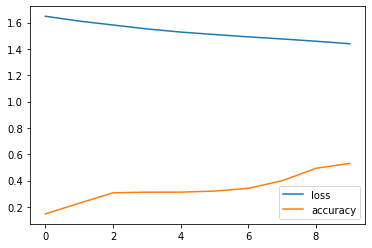

Esperimento con L1=4, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 4s 323ms/step - loss: 1.5473 - accuracy: 0.2861 - val_loss: 1.4927 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 4s 305ms/step - loss: 1.5039 - accuracy: 0.3018 - val_loss: 1.4813 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 4s 303ms/step - loss: 1.4688 - accuracy: 0.3832 - val_loss: 1.4873 - val_accuracy: 0.3125
Epoch 4/10
12/12 [==============================] - 4s 307ms/step - loss: 1.4231 - accuracy: 0.4619 - val_loss: 1.4728 - val_accuracy: 0.2812
Epoch 5/10
12/12 [==============================] - 4s 303ms/step - loss: 1.3733 - accuracy: 0.5144 - val_loss: 1.4704 - val_accuracy: 0.3333
Epoch 6/10
12/12 [==============================] - 4s 306ms/step - loss: 1.3218 - accuracy: 0.5827 - val_loss: 1.4664 - val_accuracy: 0.3333
Epoch 7/10
12/12 [==============================] - 4s 303ms/step - loss: 1.2783 - accuracy: 0.6352 - va

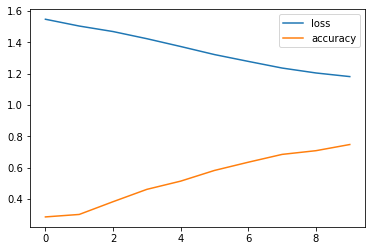

Esperimento con L1=4, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 352ms/step - loss: 1.6021 - accuracy: 0.2966 - val_loss: 1.5769 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 4s 335ms/step - loss: 1.5266 - accuracy: 0.3307 - val_loss: 1.5670 - val_accuracy: 0.3333
Epoch 3/10
12/12 [==============================] - 4s 340ms/step - loss: 1.4804 - accuracy: 0.4331 - val_loss: 1.5737 - val_accuracy: 0.2812
Epoch 4/10
12/12 [==============================] - 4s 342ms/step - loss: 1.4350 - accuracy: 0.4646 - val_loss: 1.5650 - val_accuracy: 0.2708
Epoch 5/10
12/12 [==============================] - 4s 338ms/step - loss: 1.4031 - accuracy: 0.4856 - val_loss: 1.5789 - val_accuracy: 0.2812
Epoch 6/10
12/12 [==============================] - 4s 341ms/step - loss: 1.3721 - accuracy: 0.4987 - val_loss: 1.5672 - val_accuracy: 0.2500
Epoch 7/10
12/12 [==============================] - 4s 337ms/step - loss: 1.3294 - accuracy: 0.4908 - v

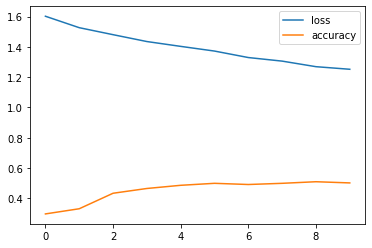

Esperimento con L1=4, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 355ms/step - loss: 1.5596 - accuracy: 0.2966 - val_loss: 1.5078 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 4s 342ms/step - loss: 1.4826 - accuracy: 0.3123 - val_loss: 1.5075 - val_accuracy: 0.3229
Epoch 3/10
12/12 [==============================] - 4s 342ms/step - loss: 1.4251 - accuracy: 0.3360 - val_loss: 1.5024 - val_accuracy: 0.3542
Epoch 4/10
12/12 [==============================] - 4s 336ms/step - loss: 1.3724 - accuracy: 0.4304 - val_loss: 1.5091 - val_accuracy: 0.3542
Epoch 5/10
12/12 [==============================] - 4s 338ms/step - loss: 1.3290 - accuracy: 0.5092 - val_loss: 1.5187 - val_accuracy: 0.3438
Epoch 6/10
12/12 [==============================] - 4s 339ms/step - loss: 1.2812 - accuracy: 0.6640 - val_loss: 1.4887 - val_accuracy: 0.3646
Epoch 7/10
12/12 [==============================] - 4s 341ms/step - loss: 1.2427 - accuracy: 0.7270 - v

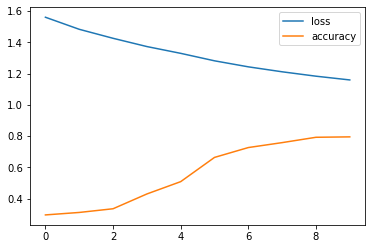

Esperimento con L1=8, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 354ms/step - loss: 1.5824 - accuracy: 0.2677 - val_loss: 1.5838 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 4s 341ms/step - loss: 1.5390 - accuracy: 0.2992 - val_loss: 1.5780 - val_accuracy: 0.3021
Epoch 3/10
12/12 [==============================] - 4s 341ms/step - loss: 1.4827 - accuracy: 0.3937 - val_loss: 1.5681 - val_accuracy: 0.3125
Epoch 4/10
12/12 [==============================] - 4s 346ms/step - loss: 1.4216 - accuracy: 0.4777 - val_loss: 1.5706 - val_accuracy: 0.3229
Epoch 5/10
12/12 [==============================] - 4s 342ms/step - loss: 1.3696 - accuracy: 0.5223 - val_loss: 1.5745 - val_accuracy: 0.3021
Epoch 6/10
12/12 [==============================] - 4s 341ms/step - loss: 1.3258 - accuracy: 0.5827 - val_loss: 1.5655 - val_accuracy: 0.3438
Epoch 7/10
12/12 [==============================] - 4s 341ms/step - loss: 1.2949 - accuracy: 0.5696 - va

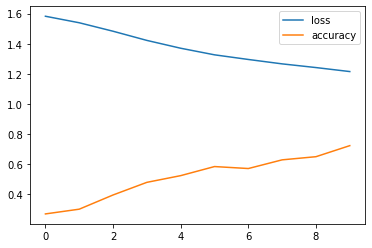

Esperimento con L1=8, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 360ms/step - loss: 1.5747 - accuracy: 0.2782 - val_loss: 1.5331 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 4s 343ms/step - loss: 1.5343 - accuracy: 0.2966 - val_loss: 1.5294 - val_accuracy: 0.3229
Epoch 3/10
12/12 [==============================] - 4s 343ms/step - loss: 1.5319 - accuracy: 0.2966 - val_loss: 1.5256 - val_accuracy: 0.3229
Epoch 4/10
12/12 [==============================] - 4s 346ms/step - loss: 1.5296 - accuracy: 0.2966 - val_loss: 1.5223 - val_accuracy: 0.3229
Epoch 5/10
12/12 [==============================] - 4s 344ms/step - loss: 1.5277 - accuracy: 0.2966 - val_loss: 1.5193 - val_accuracy: 0.3229
Epoch 6/10
12/12 [==============================] - 4s 343ms/step - loss: 1.5259 - accuracy: 0.2966 - val_loss: 1.5165 - val_accuracy: 0.3229
Epoch 7/10
12/12 [==============================] - 4s 343ms/step - loss: 1.5242 - accuracy: 0.2966 - va

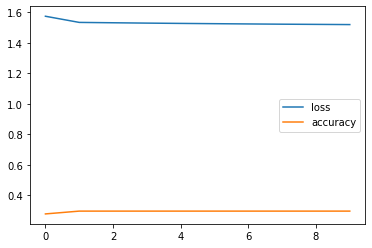

Esperimento con L1=8, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 6s 432ms/step - loss: 1.5248 - accuracy: 0.2703 - val_loss: 1.5131 - val_accuracy: 0.2292
Epoch 2/10
12/12 [==============================] - 5s 425ms/step - loss: 1.4813 - accuracy: 0.3202 - val_loss: 1.4936 - val_accuracy: 0.3438
Epoch 3/10
12/12 [==============================] - 6s 465ms/step - loss: 1.4227 - accuracy: 0.4068 - val_loss: 1.4806 - val_accuracy: 0.3750
Epoch 4/10
12/12 [==============================] - 5s 422ms/step - loss: 1.3715 - accuracy: 0.4829 - val_loss: 1.4773 - val_accuracy: 0.3333
Epoch 5/10
12/12 [==============================] - 5s 383ms/step - loss: 1.3259 - accuracy: 0.5591 - val_loss: 1.4746 - val_accuracy: 0.3229
Epoch 6/10
12/12 [==============================] - 5s 384ms/step - loss: 1.2904 - accuracy: 0.6299 - val_loss: 1.4988 - val_accuracy: 0.2604
Epoch 7/10
12/12 [==============================] - 5s 381ms/step - loss: 1.2639 - accuracy: 0.6929 - v

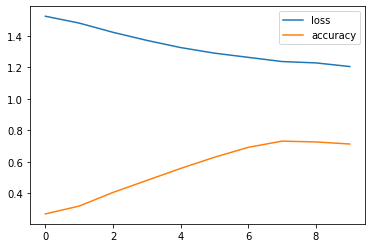

Esperimento con L1=8, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 400ms/step - loss: 1.5891 - accuracy: 0.2966 - val_loss: 1.5454 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 5s 384ms/step - loss: 1.5067 - accuracy: 0.3570 - val_loss: 1.5448 - val_accuracy: 0.2604
Epoch 3/10
12/12 [==============================] - 5s 385ms/step - loss: 1.4387 - accuracy: 0.4567 - val_loss: 1.5383 - val_accuracy: 0.2917
Epoch 4/10
12/12 [==============================] - 5s 386ms/step - loss: 1.3760 - accuracy: 0.5302 - val_loss: 1.5634 - val_accuracy: 0.2604
Epoch 5/10
12/12 [==============================] - 5s 386ms/step - loss: 1.3236 - accuracy: 0.5696 - val_loss: 1.5640 - val_accuracy: 0.2708
Epoch 6/10
12/12 [==============================] - 5s 388ms/step - loss: 1.2809 - accuracy: 0.5958 - val_loss: 1.5622 - val_accuracy: 0.2917
Epoch 7/10
12/12 [==============================] - 5s 385ms/step - loss: 1.2461 - accuracy: 0.6247 - v

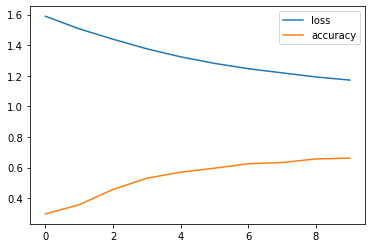

Esperimento con L1=16, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 504ms/step - loss: 1.5761 - accuracy: 0.2730 - val_loss: 1.5178 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 6s 491ms/step - loss: 1.4651 - accuracy: 0.2835 - val_loss: 1.5153 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 6s 490ms/step - loss: 1.3760 - accuracy: 0.3596 - val_loss: 1.5596 - val_accuracy: 0.2500
Epoch 4/10
12/12 [==============================] - 6s 488ms/step - loss: 1.2990 - accuracy: 0.4199 - val_loss: 1.5768 - val_accuracy: 0.2292
Epoch 5/10
12/12 [==============================] - 6s 495ms/step - loss: 1.2432 - accuracy: 0.4724 - val_loss: 1.5771 - val_accuracy: 0.1979
Epoch 6/10
12/12 [==============================] - 6s 490ms/step - loss: 1.1977 - accuracy: 0.4882 - val_loss: 1.5837 - val_accuracy: 0.1979
Epoch 7/10
12/12 [==============================] - 6s 497ms/step - loss: 1.1660 - accuracy: 0.5118 - v

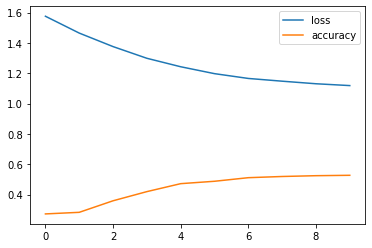

Esperimento con L1=16, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 507ms/step - loss: 1.5741 - accuracy: 0.1995 - val_loss: 1.5641 - val_accuracy: 0.1562
Epoch 2/10
12/12 [==============================] - 6s 495ms/step - loss: 1.5480 - accuracy: 0.2205 - val_loss: 1.5572 - val_accuracy: 0.1562
Epoch 3/10
12/12 [==============================] - 6s 492ms/step - loss: 1.5436 - accuracy: 0.2205 - val_loss: 1.5507 - val_accuracy: 0.1562
Epoch 4/10
12/12 [==============================] - 6s 493ms/step - loss: 1.5394 - accuracy: 0.2205 - val_loss: 1.5445 - val_accuracy: 0.1562
Epoch 5/10
12/12 [==============================] - 6s 491ms/step - loss: 1.5359 - accuracy: 0.2205 - val_loss: 1.5386 - val_accuracy: 0.1562
Epoch 6/10
12/12 [==============================] - 6s 491ms/step - loss: 1.5326 - accuracy: 0.2205 - val_loss: 1.5334 - val_accuracy: 0.1562
Epoch 7/10
12/12 [==============================] - 6s 493ms/step - loss: 1.5296 - accuracy: 0.2205 - v

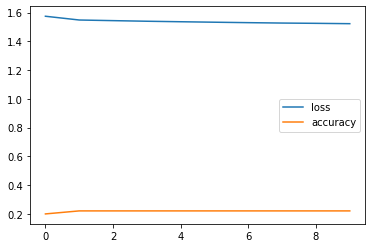

Esperimento con L1=16, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 8s 600ms/step - loss: 1.6865 - accuracy: 0.1522 - val_loss: 1.6613 - val_accuracy: 0.2396
Epoch 2/10
12/12 [==============================] - 7s 545ms/step - loss: 1.5794 - accuracy: 0.2467 - val_loss: 1.6584 - val_accuracy: 0.1250
Epoch 3/10
12/12 [==============================] - 7s 547ms/step - loss: 1.5233 - accuracy: 0.2546 - val_loss: 1.6593 - val_accuracy: 0.2292
Epoch 4/10
12/12 [==============================] - 7s 546ms/step - loss: 1.4617 - accuracy: 0.2861 - val_loss: 1.6647 - val_accuracy: 0.2500
Epoch 5/10
12/12 [==============================] - 7s 549ms/step - loss: 1.4237 - accuracy: 0.3045 - val_loss: 1.6598 - val_accuracy: 0.2500
Epoch 6/10
12/12 [==============================] - 7s 544ms/step - loss: 1.3938 - accuracy: 0.3228 - val_loss: 1.6492 - val_accuracy: 0.2604
Epoch 7/10
12/12 [==============================] - 6s 545ms/step - loss: 1.3706 - accuracy: 0.3202 - 

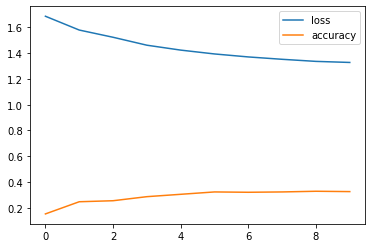

Esperimento con L1=16, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 563ms/step - loss: 1.5683 - accuracy: 0.2808 - val_loss: 1.5587 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 7s 554ms/step - loss: 1.5273 - accuracy: 0.2966 - val_loss: 1.5396 - val_accuracy: 0.3438
Epoch 3/10
12/12 [==============================] - 7s 556ms/step - loss: 1.4887 - accuracy: 0.3123 - val_loss: 1.5273 - val_accuracy: 0.3333
Epoch 4/10
12/12 [==============================] - 7s 551ms/step - loss: 1.4532 - accuracy: 0.3517 - val_loss: 1.5237 - val_accuracy: 0.3438
Epoch 5/10
12/12 [==============================] - 7s 550ms/step - loss: 1.4182 - accuracy: 0.4751 - val_loss: 1.5108 - val_accuracy: 0.3438
Epoch 6/10
12/12 [==============================] - 7s 555ms/step - loss: 1.3888 - accuracy: 0.5643 - val_loss: 1.5038 - val_accuracy: 0.3438
Epoch 7/10
12/12 [==============================] - 7s 553ms/step - loss: 1.3718 - accuracy: 0.5906 - 

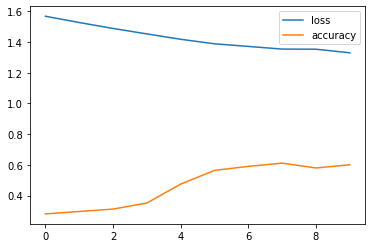

In [21]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

layer1 = [4, 8, 16]
layer2 = [8, 16]
layerDense = [4, 8]
epochs = [10]

for l1 in layer1:
    for l2 in layer2:
        for ld in layerDense:
            for e in epochs:
                
                print("Esperimento con L1="+str(l1)+ ", L2="+str(l2)+ ", LD="+str(ld)+", epochs="+str(e))
                #create model
                model = Sequential()

                #add model layers

                model.add(Conv2D(l1, kernel_size=(3,3), activation='relu', input_shape=(120,120,1), padding='same'))
                model.add(Conv2D(l2, kernel_size=(3,3), activation='relu', padding='same'))

                #model.add(MaxPooling2D(pool_size=(2,2)))

                #model.add(Dropout(0.25))

                model.add(Flatten())

                model.add(Dense(ld, activation='softmax'))

                #model.add(Dropout(rate=0.5))

                model.add(Dense(5, activation='softmax'))
                
                model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
                prova = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=e, batch_size=32)

                # immagina di avere una lista chiamata "history" che contiene i dati di loss e accuracy
                # ottenuti dal fit della tua CNN

                # estrai i dati di loss e accuracy dalla lista "history"
                loss = prova.history['loss']
                acc = prova.history['accuracy']

                fig, ax = plt.subplots()
                ax.plot(loss, label='loss')
                ax.plot(acc, label='accuracy')
                ax.legend()
                plt.show()


Esperimento con L1=4, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 6s 495ms/step - loss: 1.5715 - accuracy: 0.2362 - val_loss: 1.5362 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 7s 559ms/step - loss: 1.5435 - accuracy: 0.2966 - val_loss: 1.5325 - val_accuracy: 0.3229
Epoch 3/10
12/12 [==============================] - 6s 533ms/step - loss: 1.5405 - accuracy: 0.2966 - val_loss: 1.5294 - val_accuracy: 0.3229
Epoch 4/10
12/12 [==============================] - 7s 592ms/step - loss: 1.5381 - accuracy: 0.2966 - val_loss: 1.5262 - val_accuracy: 0.3229
Epoch 5/10
12/12 [==============================] - 6s 490ms/step - loss: 1.5359 - accuracy: 0.2966 - val_loss: 1.5228 - val_accuracy: 0.3229
Epoch 6/10
12/12 [==============================] - 4s 303ms/step - loss: 1.5333 - accuracy: 0.2966 - val_loss: 1.5204 - val_accuracy: 0.3229
Epoch 7/10
12/12 [==============================] - 4s 306ms/step - loss: 1.5316 - accuracy: 0.2966 - va

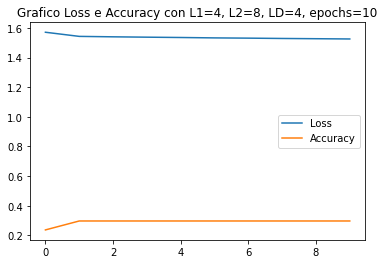

Esperimento con L1=4, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 4s 317ms/step - loss: 1.5424 - accuracy: 0.2441 - val_loss: 1.5129 - val_accuracy: 0.1562
Epoch 2/10
12/12 [==============================] - 4s 308ms/step - loss: 1.5153 - accuracy: 0.2913 - val_loss: 1.5115 - val_accuracy: 0.3229
Epoch 3/10
12/12 [==============================] - 4s 306ms/step - loss: 1.5066 - accuracy: 0.2966 - val_loss: 1.5097 - val_accuracy: 0.3229
Epoch 4/10
12/12 [==============================] - 4s 310ms/step - loss: 1.4954 - accuracy: 0.2966 - val_loss: 1.5136 - val_accuracy: 0.3229
Epoch 5/10
12/12 [==============================] - 4s 313ms/step - loss: 1.4822 - accuracy: 0.3491 - val_loss: 1.5130 - val_accuracy: 0.3125
Epoch 6/10
12/12 [==============================] - 4s 307ms/step - loss: 1.4682 - accuracy: 0.4593 - val_loss: 1.5117 - val_accuracy: 0.3125
Epoch 7/10
12/12 [==============================] - 4s 310ms/step - loss: 1.4554 - accuracy: 0.4698 - va

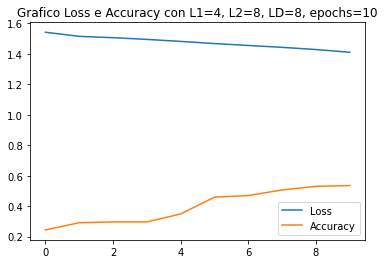

Esperimento con L1=4, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 361ms/step - loss: 1.5698 - accuracy: 0.2520 - val_loss: 1.4931 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 4s 339ms/step - loss: 1.4823 - accuracy: 0.3780 - val_loss: 1.5231 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 4s 343ms/step - loss: 1.4123 - accuracy: 0.4777 - val_loss: 1.5130 - val_accuracy: 0.2917
Epoch 4/10
12/12 [==============================] - 4s 342ms/step - loss: 1.3546 - accuracy: 0.4961 - val_loss: 1.5405 - val_accuracy: 0.3021
Epoch 5/10
12/12 [==============================] - 4s 341ms/step - loss: 1.3155 - accuracy: 0.5249 - val_loss: 1.5366 - val_accuracy: 0.3542
Epoch 6/10
12/12 [==============================] - 4s 342ms/step - loss: 1.2865 - accuracy: 0.5249 - val_loss: 1.5486 - val_accuracy: 0.3125
Epoch 7/10
12/12 [==============================] - 5s 423ms/step - loss: 1.2592 - accuracy: 0.5302 - v

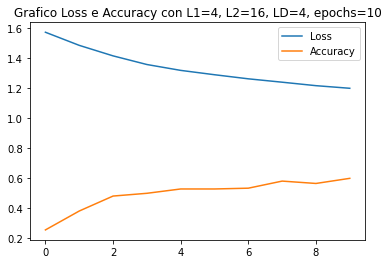

Esperimento con L1=4, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 359ms/step - loss: 1.5463 - accuracy: 0.2677 - val_loss: 1.4807 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 4s 340ms/step - loss: 1.5127 - accuracy: 0.2598 - val_loss: 1.4816 - val_accuracy: 0.2708
Epoch 3/10
12/12 [==============================] - 4s 343ms/step - loss: 1.4654 - accuracy: 0.3780 - val_loss: 1.4695 - val_accuracy: 0.2708
Epoch 4/10
12/12 [==============================] - 4s 344ms/step - loss: 1.4336 - accuracy: 0.4147 - val_loss: 1.4738 - val_accuracy: 0.2812
Epoch 5/10
12/12 [==============================] - 4s 345ms/step - loss: 1.4120 - accuracy: 0.4593 - val_loss: 1.4824 - val_accuracy: 0.3229
Epoch 6/10
12/12 [==============================] - 4s 347ms/step - loss: 1.3919 - accuracy: 0.4619 - val_loss: 1.4769 - val_accuracy: 0.3021
Epoch 7/10
12/12 [==============================] - 4s 346ms/step - loss: 1.3713 - accuracy: 0.4777 - v

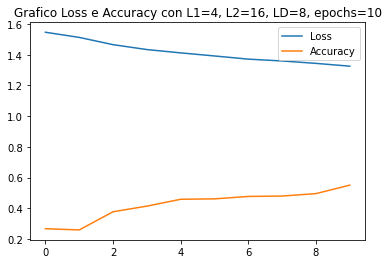

Esperimento con L1=8, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 359ms/step - loss: 1.5537 - accuracy: 0.2651 - val_loss: 1.5283 - val_accuracy: 0.3333
Epoch 2/10
12/12 [==============================] - 4s 346ms/step - loss: 1.4583 - accuracy: 0.4121 - val_loss: 1.5254 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 4s 346ms/step - loss: 1.3823 - accuracy: 0.4751 - val_loss: 1.5050 - val_accuracy: 0.3021
Epoch 4/10
12/12 [==============================] - 4s 347ms/step - loss: 1.3103 - accuracy: 0.4934 - val_loss: 1.5431 - val_accuracy: 0.2812
Epoch 5/10
12/12 [==============================] - 4s 345ms/step - loss: 1.2620 - accuracy: 0.4908 - val_loss: 1.5266 - val_accuracy: 0.2812
Epoch 6/10
12/12 [==============================] - 4s 343ms/step - loss: 1.2231 - accuracy: 0.4934 - val_loss: 1.5235 - val_accuracy: 0.2812
Epoch 7/10
12/12 [==============================] - 4s 345ms/step - loss: 1.2014 - accuracy: 0.5092 - va

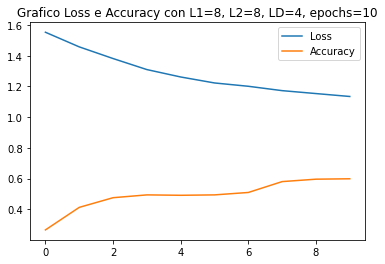

Esperimento con L1=8, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 364ms/step - loss: 1.5596 - accuracy: 0.2992 - val_loss: 1.5191 - val_accuracy: 0.3646
Epoch 2/10
12/12 [==============================] - 4s 347ms/step - loss: 1.5029 - accuracy: 0.3622 - val_loss: 1.5032 - val_accuracy: 0.3750
Epoch 3/10
12/12 [==============================] - 4s 346ms/step - loss: 1.4690 - accuracy: 0.3937 - val_loss: 1.5029 - val_accuracy: 0.3542
Epoch 4/10
12/12 [==============================] - 4s 346ms/step - loss: 1.4266 - accuracy: 0.4436 - val_loss: 1.5000 - val_accuracy: 0.3854
Epoch 5/10
12/12 [==============================] - 4s 346ms/step - loss: 1.3817 - accuracy: 0.5092 - val_loss: 1.5057 - val_accuracy: 0.3750
Epoch 6/10
12/12 [==============================] - 4s 350ms/step - loss: 1.3364 - accuracy: 0.5879 - val_loss: 1.4974 - val_accuracy: 0.4062
Epoch 7/10
12/12 [==============================] - 4s 349ms/step - loss: 1.2959 - accuracy: 0.6430 - va

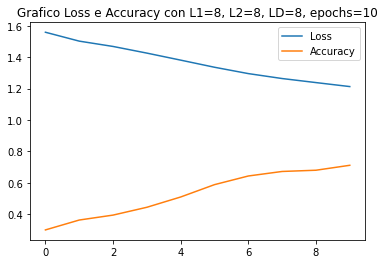

Esperimento con L1=8, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 409ms/step - loss: 1.5729 - accuracy: 0.2677 - val_loss: 1.5378 - val_accuracy: 0.2708
Epoch 2/10
12/12 [==============================] - 5s 393ms/step - loss: 1.4780 - accuracy: 0.5459 - val_loss: 1.5364 - val_accuracy: 0.2812
Epoch 3/10
12/12 [==============================] - 5s 389ms/step - loss: 1.4013 - accuracy: 0.6220 - val_loss: 1.5362 - val_accuracy: 0.3021
Epoch 4/10
12/12 [==============================] - 5s 388ms/step - loss: 1.3358 - accuracy: 0.6798 - val_loss: 1.5394 - val_accuracy: 0.2708
Epoch 5/10
12/12 [==============================] - 5s 391ms/step - loss: 1.2784 - accuracy: 0.7270 - val_loss: 1.5463 - val_accuracy: 0.2917
Epoch 6/10
12/12 [==============================] - 5s 389ms/step - loss: 1.2372 - accuracy: 0.7585 - val_loss: 1.5438 - val_accuracy: 0.2812
Epoch 7/10
12/12 [==============================] - 5s 388ms/step - loss: 1.2117 - accuracy: 0.7533 - v

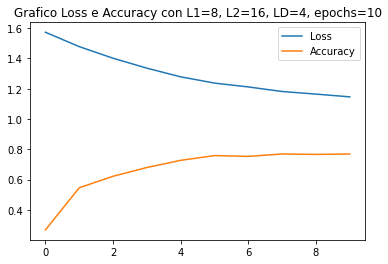

Esperimento con L1=8, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 403ms/step - loss: 1.5476 - accuracy: 0.2966 - val_loss: 1.5186 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 5s 389ms/step - loss: 1.4885 - accuracy: 0.3333 - val_loss: 1.5244 - val_accuracy: 0.3958
Epoch 3/10
12/12 [==============================] - 5s 393ms/step - loss: 1.4054 - accuracy: 0.4514 - val_loss: 1.5165 - val_accuracy: 0.3438
Epoch 4/10
12/12 [==============================] - 5s 390ms/step - loss: 1.3361 - accuracy: 0.5459 - val_loss: 1.5463 - val_accuracy: 0.3333
Epoch 5/10
12/12 [==============================] - 5s 390ms/step - loss: 1.2716 - accuracy: 0.6010 - val_loss: 1.5461 - val_accuracy: 0.3333
Epoch 6/10
12/12 [==============================] - 5s 389ms/step - loss: 1.2295 - accuracy: 0.6378 - val_loss: 1.5335 - val_accuracy: 0.3438
Epoch 7/10
12/12 [==============================] - 5s 390ms/step - loss: 1.2047 - accuracy: 0.6378 - v

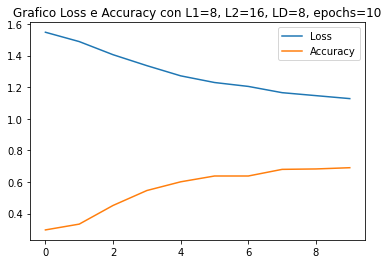

Esperimento con L1=16, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 9s 712ms/step - loss: 1.5332 - accuracy: 0.2310 - val_loss: 1.5371 - val_accuracy: 0.3021
Epoch 2/10
12/12 [==============================] - 6s 501ms/step - loss: 1.4933 - accuracy: 0.3150 - val_loss: 1.5329 - val_accuracy: 0.2188
Epoch 3/10
12/12 [==============================] - 6s 501ms/step - loss: 1.4312 - accuracy: 0.4331 - val_loss: 1.5185 - val_accuracy: 0.2500
Epoch 4/10
12/12 [==============================] - 6s 502ms/step - loss: 1.3772 - accuracy: 0.4908 - val_loss: 1.5115 - val_accuracy: 0.2604
Epoch 5/10
12/12 [==============================] - 6s 497ms/step - loss: 1.3343 - accuracy: 0.5144 - val_loss: 1.5322 - val_accuracy: 0.2292
Epoch 6/10
12/12 [==============================] - 6s 498ms/step - loss: 1.3146 - accuracy: 0.5092 - val_loss: 1.5206 - val_accuracy: 0.2188
Epoch 7/10
12/12 [==============================] - 6s 505ms/step - loss: 1.3016 - accuracy: 0.5039 - v

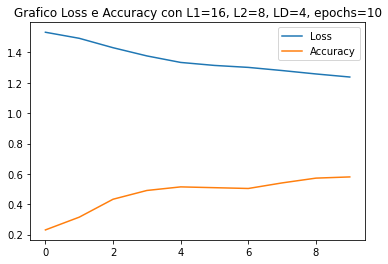

Esperimento con L1=16, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 561ms/step - loss: 1.5370 - accuracy: 0.2205 - val_loss: 1.5107 - val_accuracy: 0.2500
Epoch 2/10
12/12 [==============================] - 6s 497ms/step - loss: 1.4780 - accuracy: 0.3045 - val_loss: 1.5151 - val_accuracy: 0.2604
Epoch 3/10
12/12 [==============================] - 6s 498ms/step - loss: 1.4352 - accuracy: 0.3832 - val_loss: 1.4877 - val_accuracy: 0.2708
Epoch 4/10
12/12 [==============================] - 6s 493ms/step - loss: 1.3831 - accuracy: 0.4777 - val_loss: 1.4934 - val_accuracy: 0.2083
Epoch 5/10
12/12 [==============================] - 6s 493ms/step - loss: 1.3410 - accuracy: 0.5381 - val_loss: 1.4720 - val_accuracy: 0.2604
Epoch 6/10
12/12 [==============================] - 6s 492ms/step - loss: 1.3130 - accuracy: 0.5906 - val_loss: 1.4642 - val_accuracy: 0.2396
Epoch 7/10
12/12 [==============================] - 6s 492ms/step - loss: 1.2998 - accuracy: 0.5276 - v

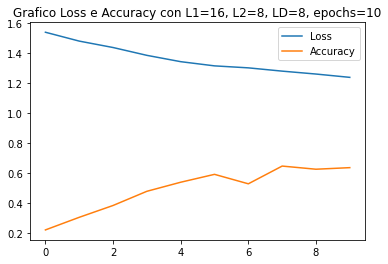

Esperimento con L1=16, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 575ms/step - loss: 1.5283 - accuracy: 0.2808 - val_loss: 1.4838 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 7s 553ms/step - loss: 1.5133 - accuracy: 0.2730 - val_loss: 1.4828 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 7s 555ms/step - loss: 1.5125 - accuracy: 0.2730 - val_loss: 1.4816 - val_accuracy: 0.3125
Epoch 4/10
12/12 [==============================] - 7s 552ms/step - loss: 1.5111 - accuracy: 0.2730 - val_loss: 1.4807 - val_accuracy: 0.3125
Epoch 5/10
12/12 [==============================] - 7s 621ms/step - loss: 1.5102 - accuracy: 0.2730 - val_loss: 1.4803 - val_accuracy: 0.3125
Epoch 6/10
12/12 [==============================] - 7s 587ms/step - loss: 1.5095 - accuracy: 0.2730 - val_loss: 1.4798 - val_accuracy: 0.3125
Epoch 7/10
12/12 [==============================] - 7s 555ms/step - loss: 1.5088 - accuracy: 0.2730 - 

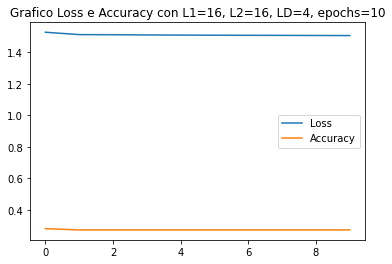

Esperimento con L1=16, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 577ms/step - loss: 1.5771 - accuracy: 0.2257 - val_loss: 1.5573 - val_accuracy: 0.2083
Epoch 2/10
12/12 [==============================] - 7s 552ms/step - loss: 1.4633 - accuracy: 0.3911 - val_loss: 1.5663 - val_accuracy: 0.1771
Epoch 3/10
12/12 [==============================] - 7s 556ms/step - loss: 1.3786 - accuracy: 0.5249 - val_loss: 1.5780 - val_accuracy: 0.2396
Epoch 4/10
12/12 [==============================] - 7s 553ms/step - loss: 1.3139 - accuracy: 0.5958 - val_loss: 1.5533 - val_accuracy: 0.2708
Epoch 5/10
12/12 [==============================] - 7s 555ms/step - loss: 1.2500 - accuracy: 0.6404 - val_loss: 1.5449 - val_accuracy: 0.3542
Epoch 6/10
12/12 [==============================] - 7s 556ms/step - loss: 1.2079 - accuracy: 0.6562 - val_loss: 1.5775 - val_accuracy: 0.3229
Epoch 7/10
12/12 [==============================] - 7s 553ms/step - loss: 1.1803 - accuracy: 0.6693 - 

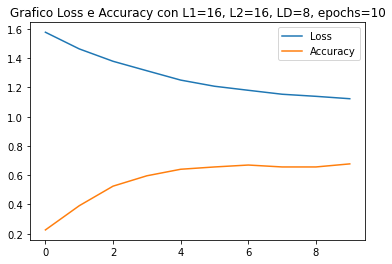

In [29]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

layer1 = [4, 8, 16]
layer2 = [8, 16]
layerDense = [4, 8]
epochs = [10]

for l1 in layer1:
    for l2 in layer2:
        for ld in layerDense:
            for e in epochs:
                
                print("Esperimento con L1="+str(l1)+ ", L2="+str(l2)+ ", LD="+str(ld)+", epochs="+str(e))
                #create model
                model = Sequential()

                #add model layers

                model.add(Conv2D(l1, kernel_size=(3,3), activation='relu', input_shape=(120,120,1), padding='same'))
                model.add(Conv2D(l2, kernel_size=(3,3), activation='relu', padding='same'))

                #model.add(MaxPooling2D(pool_size=(2,2)))

                #model.add(Dropout(0.25))

                model.add(Flatten())

                model.add(Dense(ld, activation='softmax'))

                #model.add(Dropout(rate=0.5))

                model.add(Dense(5, activation='softmax'))
                
                model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
                prova = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=e, batch_size=32)

                # immagina di avere una lista chiamata "history" che contiene i dati di loss e accuracy
                # ottenuti dal fit della tua CNN

                # estrai i dati di loss e accuracy dalla lista "history"
                loss = prova.history['loss']
                accuracy = prova.history['accuracy']
                
                fig = plt.figure() # Creare una figura
                ax = fig.add_subplot(111) # Creare un sottografico con 1 riga e 1 colonna

                # Plottare i dati loss e accuracy
                ax.plot(loss, label='Loss')
                ax.plot(accuracy, label='Accuracy')

                plt.title("Grafico Loss e Accuracy con L1="+str(l1)+ ", L2="+str(l2)+ ", LD="+str(ld)+", epochs="+str(e))
                plt.legend()
                my_plot = plt # Salvare il grafico in una variabile e in un file png
                plt.savefig("/content/grafici/plot_{}.png".format(""+str(l1)+"_"+str(l2)+"_"+str(ld)))
                plt.show()


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 120, 120, 32)      320       
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 60, 60, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 230400)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                7372832   
                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
prova = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)


In [ ]:
prova = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
12/12 [==============================] - 11s 761ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 2/10
12/12 [==============================] - 9s 774ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 3/10
12/12 [==============================] - 9s 773ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 4/10
12/12 [==============================] - 9s 750ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 5/10
12/12 [==============================] - 9s 771ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 6/10
12/12 [==============================] - 9s 750ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 7/10
12/12 [==============================] - 9s 749ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 8/10
12/12 [=============================

In [ ]:
import matplotlib.pyplot as plt

plt.plot(prova.prova['categorical_crossentropy'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', "Validation"], loc='upper right')
plt.show()

AttributeError: 'History' object has no attribute 'prova'